# PRÁCTICA 02.
# Perceptrón Simple.

### OBJETIVO:

Que el alumno implemente el perceptrón simple y lo aplique en distintos conjuntos de datos aplicando variaciones en la forma de aprendizaje del perceptrón.

In [769]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import json, matplotlib
from IPython.core.pylabtools import figsize
figsize(11, 5)

from ipywidgets import interact, interact_manual, interactive, fixed
import ipywidgets as widgets
from IPython.display import display
import numpy as np


In [770]:
class Perceptron:
    def __init__(self, num_inputs, weights = None, seed = 0):
        if weights: self.weights = np.copy(weights)
        else:
            np.random.seed(seed)
            self.weights = np.random.rand(num_inputs)
            
    def predict(self, input):
        ponderate_sum = np.dot(input, self.weights)
        result = 1.0 if ponderate_sum > 0 else 0.0
        
        return np.float64(result), ponderate_sum
    
    def train(self, input, desired_output, learning_rate):
        prediction, _ = self.predict(input)
        if prediction == desired_output: return
        
        add_or_substract = 1.0 if (prediction == 0.0 and desired_output == 1.0)  else -1.0
        self.weights = self.weights + (add_or_substract * input)
        
    def train_epoch(self, input_set, output_set, learning_rate, may_print = True):
        for index, input in enumerate(input_set):
            output = output_set[index]
            if may_print: print(f"input={input} index={index}")

            prediction, ponderate = self.predict(input)
            if may_print: print(f"prediction={prediction} real={output} ponderate={ponderate} ")

            self.train(input, output, learning_rate)

            prediction, ponderate = self.predict(input)
            if may_print: print(f"prediction={prediction} real={output} ponderate={ponderate} ")
            if may_print: print()

        

### PERCEPTRÓN

Un perceptrón simple es una unidad computacional con un umbral $\theta$, que al recibir $X \text{ de }n$ entradas reales $X = x_1, x_2, \cdots, x_n$ a través de sus pesos asociados $W = w_1, w_2, \cdots, w_n$, da una salida de valor 1 si la desigualdad $\sum_{i=1}^{n}w_ix_i \geq \theta$ se cumple, en otro caso la salida es 0.

La ley de aprendizaje se define como: $w_i(t+1) = w_i (t) + \alpha · d(x) · x_i$


$$
\
d(x)= 
\begin{cases}
1, & \text{si } x \in A;\\
-1, & \text{si } x \in B
\end{cases}
\
$$

y $\alpha$ la tasa de aprendizaje. Los pesos no se modifican si $x$ está bien clasificado.

1.- Implementa la clase Perceptron que contenga lo siguiente:
   * Inicialización del perceptrón dados los pesos iniciales.
   * Función **evalua_escalon** que reciba X y evalúe la salida utilizando la función escalón en el intervalo [0,1].
   * Función **entrena**, debe entrenar al perceptrón: modificación de los pesos en una iteración cada que se llame a esta función dada una tasa de aprendizaje.
   
2.- Crea un *Perceptron* de pesos iniciales aleatorios y entrénalo con el conjunto de datos datosAND con inicialización de pesos aleatorios.
    
 * Completa la función **entrenaPerceptronAND** y utiliza tu función **entrena** para que en cada paso de entrenamiento se dibuje el conjunto de datos y el plano que divide al conjunto, tal como se muestra en la figura (utiliza colores para diferenciar al conjunto de datos)
 
 <img src="figuras/foo1.png">
 
HINT1: Recuerda que el vector de pesos W contiene el vector normal al plano.
 
HINT2: Puedes utilizar la función scatter y plot_surface

In [771]:
and_input = np.array([[1, 0, 0, 0],
                     [1, 0 ,0, 1],
                     [1, 0, 1, 0],
                     [1, 0, 1, 1],
                     [1, 1, 0, 0],
                     [1, 1, 0, 1],
                     [1, 1, 1, 0],
                     [1, 1, 1, 1]]).astype(np.float64)

and_output = np.array([0,0,0,0,0, 0, 0, 1]).astype(np.float64)

In [772]:
def show_line_with_perceptron(perceptron, title):
    fig = plt.figure()
    plane = fig.add_subplot(111, projection='3d')

    plane.set_xlabel('input_1')
    plane.set_ylabel('input_2')
    plane.set_zlabel('input_3')
    plane.set_xlim(-0.2, 1.2)
    plane.set_ylim(-0.2, 1.2)
    plane.set_zlim(-0.5, 2)
    
    plane.scatter(*data_and[:-1, 1:].T, c="red", label="0")
    plane.scatter(*data_and[-1, 1:].T, c="blue", label="1")
    
    
    d, a, b, c = perceptron.weights
    normal = np.array([a, b, c])
    point  = np.array([-d/a, 0, 0])
    d_p = -np.sum(point * normal)
    xx, yy = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))

    z3 = (-normal[0]*xx - normal[1]*yy - d_p)*1./normal[2]

    plane.plot_surface(xx,yy,z3, color='cyan')
    plane.set_title(title)


In [773]:
# train
perceptron_and = None

@interact_manual(epochs=widgets.FloatSlider(min=1, max=10, step=1, value=6))
def entrenaPerceptronAND(epochs):
    global perceptron_and
    
    perceptron_and = Perceptron(4)
    epochs = int(epochs)
    for epoch in range(epochs):
        perceptron_and.train_epoch(and_input, and_output, 0.1, False)
        show_line_with_perceptron(perceptron_and, f"Epoch # {epoch + 1}")
        print(perceptron_and.predict([1, 0, 0, 0]))
    

interactive(children=(FloatSlider(value=6.0, description='epochs', max=10.0, min=1.0, step=1.0), Button(descri…

In [774]:
print(perceptron_and.predict([1,  1, 1, 1]))

AttributeError: 'NoneType' object has no attribute 'predict'

### MÍNIMOS CUADRADOS

La meta es encontrar los pesos $w$ que mejor mapean los datos de entrada en los datos objetivo. Con ese fin, se plantea la ecuación de error:

\begin{equation}
    E(w) = \frac{1}{2} \| \bar{y} − \bar{t} \|^2
\end{equation}

Con $\bar{t}$ el vector de datos objetivo, $\bar{y}$ el vector de salidas asociadas $ y(x) = X^Tw $

A partir de la ecuación anterior obtenemos:

\begin{equation}
E(w) = \frac{1}{2}(\bar{y}-\bar{t})^T(\bar{y}-\bar{t})
\end{equation}

Derivando respecto a $w$

\begin{equation}
\frac{dE(w)}{dw} = \phi(\bar{y}-\bar{t})
\end{equation}

con $\phi= [x^1  \cdots x^N] \text{ y }x^i$ el i−ésimo vector de datos de entrada a la red. $N$ el número de datos/registros de entrenamiento.

De lo anterior tenemos:

\begin{equation}
w = (\phi \phi^T)^{-1}\phi \bar{t}
\end{equation}



### ENTRENAMIENTO Y PRUEBA

Hay dos fases en el modelado con redes neuronales:
* **Fase de entrenamiento:** Se utiliza un conjunto de datos o patrones de entrenamiento
para determinar los pesos que definen el modelo. Se calculan de manera iterativa con el objeto de minimizar el error cometido entre la salida obtenida por la red neuronal y la salida deseada.

* **Fase de prueba:** Se utiliza para estimar el error de generalización del modelo.



1. Dado el conjunto de datos datos.txt anexo, entrena un perceptrón con el 70% de los datos (elegidos aleatoriamente). El otro 30% será el conjunto de prueba.

2. Para el mismo conjunto de entrenamiento, calcula los pesos $w$ con el método de mínimos cuadrados.

2. Grafica y compara los resultados de $w$ obtenidos del entrenamiento del perceptrón y el de mínimos cuadrados. La salida dece ser similar a la figura siguiente:
<img src="figuras/min_per.png">

3. Utiliza el conjunto de prueba para obtener la exactitud de los modelos.

OBS:  El archivo datos.txt contiene 3 columnas separadas por comas, las dos primeras columnas son el valor del conjunto $X = \{x_1, x_2\}$; la tercer columna son los datos objetivo $\bar{t}$


El criterio de parada tómalo como un número fijo de iteraciones o hasta que el conjunto esté  totalmente clasificado y fija la tasa de aprendizaje a una constante.


In [775]:
# Split data
data = np.loadtxt(open("data.csv", "rb"), delimiter=",").astype(np.float64)
np.random.shuffle(data)
number_of_points = len(data)
split_index = int(0.7 * number_of_points)

training, test = data[ : split_index], data[split_index : ]

training_input, training_output = training[:, [0, 1]], training[:, 2]
test_input, test_output = test[:, [0, 1]], test[:, 2]

bias = np.ones((len(training_input), 1))
training_input = np.concatenate( (bias, training_input), axis=1)

bias = np.ones((len(test_input), 1))
test_input = np.concatenate( (bias, test_input), axis=1)

training_pure_data = training_input[:, 1:].T
test_pure_data = test_input[:, 1:].T

In [776]:
# Train perceptron
perceptron2 = Perceptron(3)

for i in range(20):
    perceptron2.train_epoch(training_input, training_output, 0.08, False)
    
b, w1, w2 = perceptron2.weights
x = -b / w1
y = -b / w2

d = y
c = -y / x

line_x_perceptron = np.array([0, 6])
line_y_perceptron = c * line_x_perceptron + d

In [777]:
# Get Least Squares
phi = training_input
t = np.copy(training_output)
t[t == 0.0] = -1

beta = np.linalg.inv(phi.T @ phi) @ (phi.T @ t)

line_x_least = np.linspace(0, 5, 20)
line_y_least = -beta[0] / beta[2] - (beta[1] / beta[2]) * line_x_least

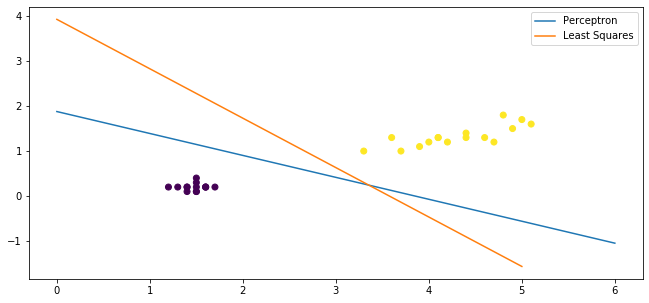

In [778]:
#Compare
plt.plot(line_x_perceptron, line_y_perceptron, label='Perceptron')
plt.plot(line_x_least, line_y_least, label='Least Squares')

plt.legend()
plt.scatter(*test_pure_data, c=test_output)

plt.show()